In [1]:
import sys
import os
workspace_path = os.path.join(os.path.abspath(".."))
sys.path.append(workspace_path)
workspace_path

'c:\\Users\\Kajsa\\VSCodeProjects\\job_discrimination'

In [2]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import glob
import re
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from unidecode import unidecode
# nltk.download('popular')
# nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer

# Local imports
from src.helpers import *

# List all available bulletins

In [31]:
path_to_cleaned_data = os.path.join(workspace_path, "data", "cleaned_data")
file_dir = os.path.join(path_to_cleaned_data, "Job_Bulletins", "labeled", "*")
file_paths = glob.glob(file_dir)

In [4]:
# Read feminine and masculine words
with open(os.path.join(path_to_cleaned_data, "men-ad-words.txt")) as f:
    masculine_words = f.read().splitlines()
with open(os.path.join(path_to_cleaned_data, "women-ad-words.txt")) as f:
    feminine_words = f.read().splitlines()

In [5]:
# Lemmatizing wordlists
masc_lemmas = lemmatize(masculine_words)
fem_lemmas = lemmatize(feminine_words)

In [6]:
for i in zip(masculine_words, masc_lemmas):
    print(i)

for i in zip(feminine_words, fem_lemmas):
    print(i)

('active', 'active')
('lead', 'lead')
('independent', 'independent')
('adventurous', 'adventurous')
('headstrong', 'headstrong')
('outspoken', 'outspoken')
('dominant', 'dominant')
('fearless', 'fearless')
('focus', 'focus')
('efficiency', 'efficiency')
('strength', 'strength')
('strategic', 'strategic')
('individual', 'individual')
('driven', 'driven')
('fearless', 'fearless')
('confident', 'confident')
('efficiency', 'efficiency')
('determined', 'determine')
('impulsive', 'impulsive')
('autonomy', 'autonomy')
('he', '')
('him', '')
('his', '')
('himself', '')
('compassion', 'compassion')
('honest', 'honest')
('kind', 'kind')
('nurturing', 'nurture')
('loyal', 'loyal')
('considerate', 'considerate')
('trust', 'trust')
('empathy', 'empathy')
('community', 'community')
('growth', 'growth')
('appreciation', 'appreciation')
('connect', 'connect')
('sensitive', 'sensitive')
('relationships', 'relationship')
('communication', 'communication')
('companionship', 'companionship')
('harmony', '

In [7]:
# Getting bulletin texts and lemmatizing them
file_names, contents = get_contents(file_paths)
contents_lemmatized = lemmatize(contents)

In [8]:
df_content = pd.DataFrame({"File Names": file_names, "lemmatized_contents": contents_lemmatized})

In [9]:
df_content

,File Names,lemmatized_contents
0,311 DIRECTOR 9206,director class code open date annual salary du...
1,ACCOUNTING CLERK 1223,accounting clerk class code open date exam ope...
2,AIR CONDITIONING MECHANIC 3774,air condition mechanic class code open date ex...
3,AIRPORT MANAGER 7260,airport manager class code open date exam open...
4,AIRPORT POLICE LIEUTENANT 3227,airport police lieutenant class code open date...
...,...,...
172,WATERWORKS MECHANIC SUPERVISOR 3987,waterworks mechanic supervisor class code open...
173,WELDER 3796,welder class code open date exam open include ...
174,WHARFINGER 1190,wharfinger class code open date exam open incl...
175,WORKERS COMPENSATION ANALYST 1774,worker compensation analyst class code open da...


In [10]:
# Counting frequency of masculine and feminine words in each bulletin
masculine_dfs = []
feminine_dfs = []
for content in contents_lemmatized:
    df_m = count_word_freq(content, masc_lemmas)
    df_f = count_word_freq(content, fem_lemmas)
    masculine_dfs.append(df_m)
    feminine_dfs.append(df_f)

# Concatenate all masculine and feminine count dfs
masc_df = pd.concat(masculine_dfs, ignore_index=True)
fem_df = pd.concat(feminine_dfs, ignore_index=True)


In [11]:
# Checking the number of bulletins that go within each count for masculine words
masc_df.sum(axis=1).value_counts().sort_values(ascending=False)

2.0    61
1.0    59
3.0    30
4.0    12
5.0     8
7.0     4
6.0     3
dtype: int64

In [12]:
# Checking the number of bulletins that go within each count for feminine words
# Note that 90 of the bulletins had no occurence of a word from the feminine list
fem_df.sum(axis=1).value_counts().sort_values(ascending=False)

0.0     90
1.0     35
2.0     23
3.0      9
4.0      5
5.0      3
6.0      3
7.0      2
8.0      2
11.0     1
9.0      1
14.0     1
12.0     1
19.0     1
dtype: int64

In [13]:
# Reading application statistics into dataframe
file_path = os.path.join(path_to_cleaned_data, "applicants.csv")
df = pd.read_csv(file_path, dtype={"ID": str})
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206 041814.txt
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223 071318.txt
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260 120216.txt
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227 091616.txt
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400 050214.txt
...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840 1...
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 120718.txt
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857 072514 rev073114.txt
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912 120817.txt


In [14]:
# Replacing old file names with cleaned versions
df["File Names"] = df["Job Description"] + " " + df["ID"]
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400
...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 4123
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912


In [15]:
df = df.merge(df_content, how="inner", on="File Names")

In [16]:
# Create and add labels
mostly_women = df["Female"] >= (df["Apps Received"] - df["Unknown_Gender"]) * 0.6
mostly_men = df["Male"] >= (df["Apps Received"] - df["Unknown_Gender"]) * 0.6
neutral = (df["Female"] < (df["Apps Received"] - df["Unknown_Gender"]) * 0.6) & (df["Female"] > (df["Apps Received"] - df["Unknown_Gender"]) * 0.4)

In [17]:
labels = []
for i in range(len(df)):
    if mostly_women[i]:
        label = "W"
    elif mostly_men[i]:
        label = "M"
    elif neutral[i]:
        label = "N"
    else:
        label = None
    labels.append(label)
df["Labels"] = labels


In [18]:
df["Labels"].value_counts()

M    126
N     32
W     19
Name: Labels, dtype: int64

In [19]:
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names,lemmatized_contents,Labels
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206,director class code open date annual salary du...,M
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223,accounting clerk class code open date exam ope...,W
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260,airport manager class code open date exam open...,M
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227,airport police lieutenant class code open date...,M
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400,aquarist class code open date annual salary ca...,M
...,...,...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840,wastewater treatment laboratory manager class ...,M
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 4123,wastewater treatment operator class code open ...,M
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857,water microbiologist class code open date revi...,N
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912,water utility worker class code open date exam...,M


In [20]:
df.isnull().sum()

ID                     0
Job Description        0
Apps Received          0
Female                 0
Male                   0
Unknown_Gender         0
File Names             0
lemmatized_contents    0
Labels                 0
dtype: int64

In [21]:
df["male_word_count"] = masc_df.sum(axis=1)
df["fem_word_count"] = fem_df.sum(axis=1)
df["male_share"] = df["Male"] / df["Apps Received"]
df["fem_share"] =df["Female"] / df["Apps Received"]
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names,lemmatized_contents,Labels,male_word_count,fem_word_count,male_share,fem_share
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206,director class code open date annual salary du...,M,2.0,0.0,0.574074,0.370370
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223,accounting clerk class code open date exam ope...,W,2.0,0.0,0.234568,0.753086
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260,airport manager class code open date exam open...,M,1.0,0.0,0.725490,0.254902
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227,airport police lieutenant class code open date...,M,1.0,2.0,0.791667,0.187500
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400,aquarist class code open date annual salary ca...,M,2.0,0.0,0.600000,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840,wastewater treatment laboratory manager class ...,M,1.0,2.0,0.562500,0.375000
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 4123,wastewater treatment operator class code open ...,M,2.0,0.0,0.904000,0.072000
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857,water microbiologist class code open date revi...,N,1.0,0.0,0.458101,0.497207
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912,water utility worker class code open date exam...,M,6.0,3.0,0.958333,0.020833


<AxesSubplot: xlabel='male_word_count', ylabel='male_share'>

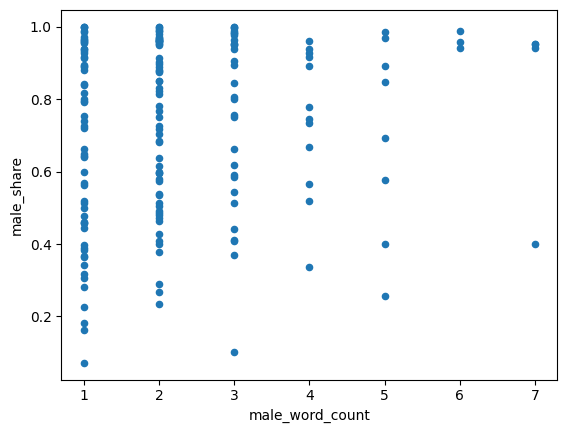

In [22]:
df.plot(kind="scatter", x="male_word_count", y="male_share")

<AxesSubplot: xlabel='fem_word_count', ylabel='fem_share'>

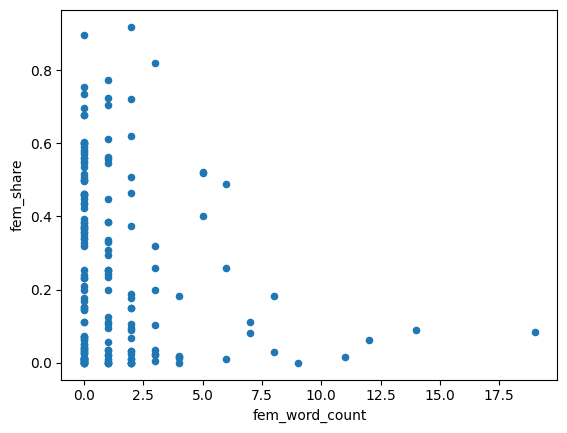

In [23]:
df.plot(kind="scatter", x="fem_word_count", y="fem_share")

<AxesSubplot: xlabel='male_word_count', ylabel='fem_word_count'>

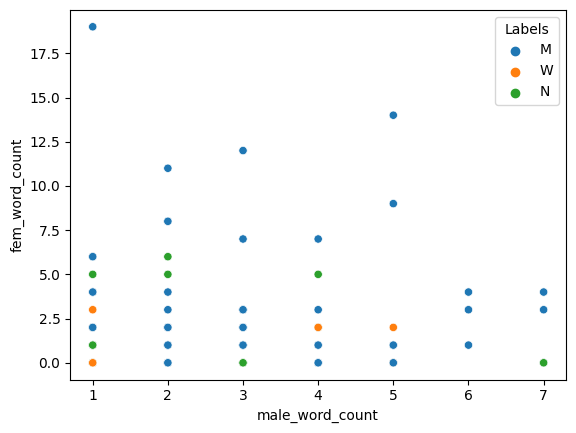

In [24]:
sns.scatterplot(data=df, x="male_word_count", y="fem_word_count", hue="Labels")

<AxesSubplot: xlabel='male_share', ylabel='fem_share'>

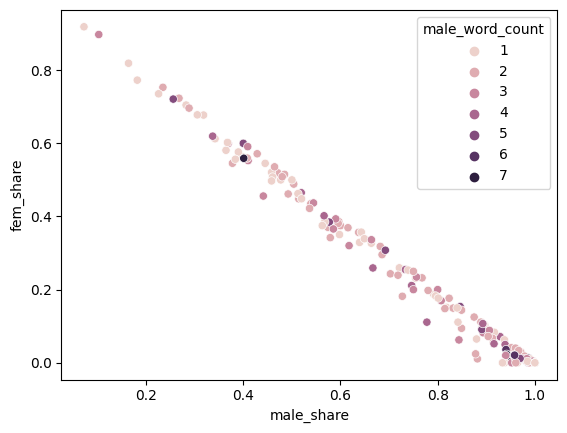

In [25]:
sns.scatterplot(data=df, x="male_share", y="fem_share", hue="male_word_count")

<AxesSubplot: xlabel='male_share', ylabel='fem_share'>

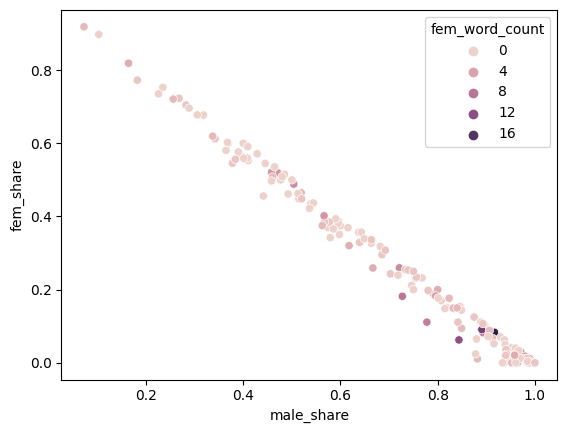

In [26]:
sns.scatterplot(data=df, x="male_share", y="fem_share", hue="fem_word_count")

C:\Users\Kajsa\AppData\Local\Temp\ipykernel_9688\906918719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr())


<AxesSubplot: >

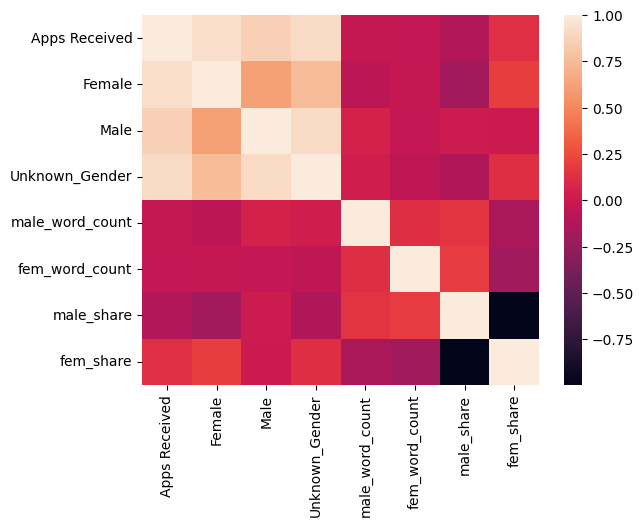

In [27]:
sns.heatmap(data=df.corr())

In [28]:
pd.options.display.float_format = "{:.2f}".format
df.corr(numeric_only=True)

,Apps Received,Female,Male,Unknown_Gender,male_word_count,fem_word_count,male_share,fem_share
Apps Received,1.00,0.93,0.86,0.91,-0.02,-0.03,-0.12,0.13
Female,0.93,1.00,0.62,0.76,-0.07,-0.02,-0.19,0.19
Male,0.86,0.62,1.00,0.91,0.05,-0.04,0.00,0.00
Unknown_Gender,0.91,0.76,0.91,1.00,0.03,-0.06,-0.12,0.12
male_word_count,-0.02,-0.07,0.05,0.03,1.00,0.13,0.15,-0.15
fem_word_count,-0.03,-0.02,-0.04,-0.06,0.13,1.00,0.19,-0.20
male_share,-0.12,-0.19,0.00,-0.12,0.15,0.19,1.00,-1.00
fem_share,0.13,0.19,0.00,0.12,-0.15,-0.20,-1.00,1.00


In [29]:
df.sort_values(by="male_word_count", ascending=True)

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names,lemmatized_contents,Labels,male_word_count,fem_word_count,male_share,fem_share
88,3801,SENIOR COMMUNICATIONS CABLE WORKER,28,0,27,1,SENIOR COMMUNICATIONS CABLE WORKER 3801,senior communication cable worker class code o...,M,1.00,4.00,0.96,0.00
123,9105,UTILITY ADMINISTRATOR,494,287,180,27,UTILITY ADMINISTRATOR 9105,utility administrator class code open date exa...,W,1.00,0.00,0.36,0.58
114,3840,STREET LIGHTING ELECTRICIAN SUPERVISOR,12,1,11,0,STREET LIGHTING ELECTRICIAN SUPERVISOR 3840,street light electrician supervisor class code...,M,1.00,19.00,0.92,0.08
106,3174,SENIOR WINDOW CLEANER,100,15,84,1,SENIOR WINDOW CLEANER 3174,senior window cleaner class code open date rev...,M,1.00,2.00,0.84,0.15
99,3146,SENIOR PARK MAINTENANCE SUPERVISOR,38,4,34,0,SENIOR PARK MAINTENANCE SUPERVISOR 3146,senior park maintenance supervisor class code ...,M,1.00,2.00,0.89,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,7291,CONSTRUCTION INSPECTOR,471,17,443,11,CONSTRUCTION INSPECTOR 7291,construction inspector class code open date ex...,M,6.00,1.00,0.94,0.04
157,3843,INSTRUMENT MECHANIC,172,4,162,6,INSTRUMENT MECHANIC 3843,instrument mechanic class code open date exam ...,M,7.00,3.00,0.94,0.02
38,2131,ENGINEER OF FIRE DEPARTMENT,558,9,532,17,ENGINEER OF FIRE DEPARTMENT 2131,engineer fire department class code open date ...,M,7.00,4.00,0.95,0.02
150,1136,DATA PROCESSING TECHNICIAN,1175,657,471,47,DATA PROCESSING TECHNICIAN 1136,data process technician class code open date e...,N,7.00,0.00,0.40,0.56


In [30]:
df[df["fem_word_count"] == 0.0].groupby(by="Labels").mean(numeric_only=True)

,Apps Received,Female,Male,Unknown_Gender,male_word_count,fem_word_count,male_share,fem_share
Labels,,,,,,,,
M,398.52,47.41,341.81,9.29,2.19,0.00,0.83,0.14
N,222.19,114.29,100.90,7.00,2.19,0.00,0.47,0.50
W,306.27,202.64,95.45,8.18,2.00,0.00,0.31,0.67
